<img src="../media/LandingPage-Header-RED-CENTRE.jpg" alt="Notebook Banner" style="width:100%; height:auto; display:block; margin-left:auto; margin-right:auto;">

# Testing

## Unit Test:

## Data Loader 


This script provides robust unit tests for the `data_loader.py` file, specifically focusing on the `load_churn_dataset` function. The goal is to ensure that data loading works correctly under various scenarios and that appropriate errors are raised when expected. This is a classic example of a unit test that isolates the function's behavior from external dependencies by creating controlled test environments.
- **Test Setup (`setUp` method):**
    - `setUp(self)`: Before each test method runs, this method sets up a temporary, isolated environment.
    - **Temporary Directory:** It creates a `tempfile.mkdtemp()` to house test CSV files. This is crucial for maintaining a clean testing environment and preventing test files from polluting your project directory.
    - **Dummy CSV File:** A `self.dummy_csv_filepath` is created with well formed, representative data. This simulates a typical, valid input for `load_churn_dataset`.
    - **Empty CSV File:** A `self.empty_csv_filepath` is created, containing only headers. This is an important edge case to test how the function handles datasets with no rows, ensuring it returns an empty DataFrame with the correct schema.

- **Test Teardown (`tearDown` method):**
    - `tearDown(self)`: After each test method completes, this method cleans up the temporary directory and all its contents using `shutil.rmtree()`. This ensures that each test run starts with a fresh slate and leaves no lingering files.

- **Individual Test Case:**
    - **`test_load_churn_dataset_success`:**
        - **Objective:** Verifies that `load_churn_dataset` successfully loads a valid CSV file into a pandas DataFrame.
        - **Assertions:**
            - `self.assertIsInstance(df, pd.DataFrame)`: Confirms the returned object is indeed a DataFrame.
            - `self.assertFalse(df.empty)`: Checks that the DataFrame is not empty.
            - `self.assertEqual(len(df), 3)`: Verifies the correct number of rows are loaded based on the dummy data.
            - `self.assertIn('customerID', df.columns)` and similar checks: Ensures that expected columns are present in the loaded DataFrame, confirming the data structure.


Simple Testing:



In [ ]:
# ml_project/tests/test_data_loader.py
"""
Objective:
    This script contains unit tests for the functions in `src/data_loader.py`,
    now implemented using Python's built-in `unittest` framework.
    It focuses on verifying the correct loading of data and proper error handling.

Tests Performed:
    - test_load_churn_dataset_success: Verifies that a well-formed CSV file is loaded
      correctly into a pandas DataFrame with expected properties.
    - test_load_churn_dataset_file_not_found: Checks that a RuntimeError is raised
      when attempting to load a non-existent file.
    - test_load_churn_dataset_empty_csv: Ensures that an empty CSV file (with headers)
      is handled gracefully, resulting in an empty DataFrame with correct columns.
"""
import unittest
import pandas as pd
import os
import sys
import tempfile
import shutil

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import the function to be tested
from src.data_loader import load_churn_dataset

class TestDataLoader(unittest.TestCase):

    def setUp(self):
        # Create a temporary directory for test files
        self.tmp_dir = tempfile.mkdtemp()
        
        # Create a dummy CSV file
        self.dummy_csv_filepath = os.path.join(self.tmp_dir, "test_churn_data.csv")
        dummy_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYAX,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
"""
        with open(self.dummy_csv_filepath, 'w') as f:
            f.write(dummy_data)

        # Create an empty CSV file with only headers
        self.empty_csv_filepath = os.path.join(self.tmp_dir, "empty_churn_data.csv")
        empty_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
"""
        with open(self.empty_csv_filepath, 'w') as f:
            f.write(empty_data)

    def tearDown(self):
        # Clean up the temporary directory
        shutil.rmtree(self.tmp_dir)

    def test_load_churn_dataset_success(self):
        """Test if the dataset is loaded successfully as a DataFrame."""
        df = load_churn_dataset(self.dummy_csv_filepath)

        self.assertIsInstance(df, pd.DataFrame)
        self.assertFalse(df.empty)
        self.assertEqual(len(df), 3)
        self.assertIn('customerID', df.columns)
        self.assertIn('Churn', df.columns)
        self.assertIn('TotalCharges', df.columns)

# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

Addional tests that we can do:

- What if the file is not found?

- **`test_load_churn_dataset_file_not_found` (Implicitly tested by the structure, but a good addition for comprehensive testing):**
    - **Objective:** (If added) Would verify that a `RuntimeError` is raised when a non existent file path is provided to `load_churn_dataset`.
    - **Mechanism:** (If added) Would use `with self.assertRaises(RuntimeError):` to wrap the call to `load_churn_dataset` with a non existent path.


- What if the file is empty? Is the script reading from somewhere else?

- **`test_load_churn_dataset_empty_csv` (Implicitly tested by the structure, but a good addition for comprehensive testing):**
    - **Objective:** (If added) Would ensure that an empty CSV file (with headers) is handled gracefully, resulting in an empty DataFrame with correct column names.
    - **Mechanism:** (If added) Would load `self.empty_csv_filepath` and assert that the DataFrame is empty but has the correct columns.

In [ ]:
# ml_project/tests/test_data_loader.py
"""
Objective:
    This script contains unit tests for the functions in `src/data_loader.py`,
    now implemented using Python's built-in `unittest` framework.
    It focuses on verifying the correct loading of data and proper error handling.

Tests Performed:
    - test_load_churn_dataset_success: Verifies that a well-formed CSV file is loaded
      correctly into a pandas DataFrame with expected properties.
    - test_load_churn_dataset_file_not_found: Checks that a RuntimeError is raised
      when attempting to load a non-existent file.
    - test_load_churn_dataset_empty_csv: Ensures that an empty CSV file (with headers)
      is handled gracefully, resulting in an empty DataFrame with correct columns.
"""
import unittest
import pandas as pd
import os
import sys
import tempfile
import shutil

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import the function to be tested
from src.data_loader import load_churn_dataset

class TestDataLoader(unittest.TestCase):

    def setUp(self):
        # Create a temporary directory for test files
        self.tmp_dir = tempfile.mkdtemp()
        
        # Create a dummy CSV file
        self.dummy_csv_filepath = os.path.join(self.tmp_dir, "test_churn_data.csv")
        dummy_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYAX,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
"""
        with open(self.dummy_csv_filepath, 'w') as f:
            f.write(dummy_data)

        # Create an empty CSV file with only headers
        self.empty_csv_filepath = os.path.join(self.tmp_dir, "empty_churn_data.csv")
        empty_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
"""
        with open(self.empty_csv_filepath, 'w') as f:
            f.write(empty_data)

    def tearDown(self):
        # Clean up the temporary directory
        shutil.rmtree(self.tmp_dir)

    def test_load_churn_dataset_success(self):
        """Test if the dataset is loaded successfully as a DataFrame."""
        df = load_churn_dataset(self.dummy_csv_filepath)

        self.assertIsInstance(df, pd.DataFrame)
        self.assertFalse(df.empty)
        self.assertEqual(len(df), 3)
        self.assertIn('customerID', df.columns)
        self.assertIn('Churn', df.columns)
        self.assertIn('TotalCharges', df.columns)

    def test_load_churn_dataset_file_not_found(self):
        """Test if RuntimeError is raised for a non-existent file."""
        non_existent_file = os.path.join(self.tmp_dir, "non_existent_file.csv")
        with self.assertRaisesRegex(RuntimeError, "Failed to load churn dataset: .*No such file or directory.*"):
            load_churn_dataset(non_existent_file)

    def test_load_churn_dataset_empty_csv(self):
        """Test loading an empty CSV file."""
        df = load_churn_dataset(self.empty_csv_filepath)

        self.assertIsInstance(df, pd.DataFrame)
        self.assertEqual(len(df), 0)
        self.assertIn('customerID', df.columns) # Should still have columns from header

# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

## Preprocessing

This script is a comprehensive suite of unit tests for the `preprocessing.py` file. It leverages Python's built in `unittest` framework to ensure that all core data preprocessing steps cleaning, pipeline construction, feature transformation, and data splitting function correctly and robustly. This is vital for maintaining data integrity and consistency throughout your ML pipeline.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before each test runs, this method prepares the necessary data and configurations. It's designed to provide consistent inputs for the subsequent tests.
    -   **`self.raw_df`:** A dummy raw `DataFrame` is created, mimicking the structure and content of your initial churn dataset. This includes edge cases like an empty string in 'TotalCharges' to test robust cleaning.
    -   **`self.config_columns`:** Defines the essential column names (target, numeric, categorical) that your preprocessing functions rely on. This promotes reusability and clarity.
    -   **Pre-computed DataFrames:** `self.cleaned_df` and `self.transformed_df` are generated by calling `clean_churn_data` and `transform_features` respectively on copies of the dummy data. This allows individual tests to start from a specific, pre-processed state without re running these potentially expensive steps for every test.

-   **Tests for `clean_churn_data`:**
    -   **`test_clean_churn_data_success`:**
        -   **Objective:** Verifies that the `clean_churn_data` function successfully transforms the raw data.
        -   **Assertions:** It checks for correct conversion of the 'Churn' column to a binary 'churn_binary' (0s and 1s), ensures 'TotalCharges' is numeric and handles empty strings as `NaN`, and confirms that the final DataFrame contains precisely the expected set of columns.
    -   **`test_clean_churn_data_missing_target_column`:**
        -   **Objective:** Tests the error handling of `clean_churn_data` when a critical column (like the target column) is missing from the input DataFrame.
        -   **Assertions:** It asserts that a `ValueError` with a specific message about missing columns is raised, ensuring the function fails gracefully under invalid inputs.

-   **Tests for `build_preprocessing_pipeline`:**
    -   **`test_build_preprocessing_pipeline_structure`:**
        -   **Objective:** Ensures that the `build_preprocessing_pipeline` function constructs the `scikit-learn` `ColumnTransformer` correctly.
        -   **Assertions:** It verifies that the returned object is indeed a `ColumnTransformer`, that it contains the expected number of transformers (one for numeric, one for categorical), and that these transformers are correctly configured `Pipeline` objects with `StandardScaler` for numeric and `OneHotEncoder` for categorical features, respectively. This confirms the pipeline's architectural correctness.

-   **Tests for `transform_features`:**
    -   **`test_transform_features_success`:**
        -   **Objective:** Confirms that `transform_features` correctly applies preprocessing and attaches essential metadata to the DataFrame.
        -   **Assertions:** It checks that the output is a DataFrame, that a 'target_encoded' column is created with the correct data type, and that the `feature_columns`, `preprocessor`, `target_mapping`, and `target_names` attributes are all present and correctly populated within the DataFrame's `.attrs` dictionary. This is a critical MLOps practice for maintaining data lineage.

-   **Tests for `split_features_and_target`:**
    -   **`test_split_features_and_target_success`:**
        -   **Objective:** Verifies that `split_features_and_target` correctly separates the DataFrame into features (X) and target (y).
        -   **Assertions:** It confirms that X is a DataFrame and y is a Series, that their lengths match, that the target column is removed from X, and that the columns in X precisely match the `feature_columns` stored in the DataFrame's attributes.
    -   **`test_split_features_and_target_missing_attrs`:**
        -   **Objective:** Tests the error handling of `split_features_and_target` when required metadata (like `feature_columns`) is missing.
        -   **Assertions:** It asserts that a `ValueError` with a specific message is raised, ensuring robustness against malformed inputs.

-   **Tests for `stratified_split` (Not explicitly defined in the provided code, but mentioned in comments. A comprehensive test would include):**
    -   **Objective:** To ensure that the `stratified_split` function correctly divides the data into training and testing sets while preserving the original class distribution of the target variable.
    -   **Assertions:** This test would typically verify that the proportions of each class in the target variable (`y`) are approximately the same in both the training and testing sets, ensuring that the model training is not biased by imbalanced splits.

In [ ]:
# ml_project/tests/test_preprocessing.py
"""
Objective:
    This script contains unit tests for the functions in `src/preprocessing.py`,
    now implemented using Python's built-in `unittest` framework.
    It ensures that data cleaning, preprocessing pipeline construction,
    feature transformation, and data splitting are performed correctly.

Tests Performed:
    - clean_churn_data:
        - Verifies successful cleaning, type conversion (e.g., TotalCharges),
          creation of churn_binary, and correct column selection.
        - Checks for proper error handling when essential columns are missing.
    - build_preprocessing_pipeline:
        - Asserts that the ColumnTransformer is correctly built with expected
          numerical and categorical transformers (StandardScaler, OneHotEncoder).
    - transform_features:
        - Confirms that target encoding is applied and that DataFrame attributes
          (like feature_columns, preprocessor) are correctly set.
    - split_features_and_target:
        - Ensures that features (X) and target (y) are accurately separated
          based on DataFrame attributes.
        - Checks for error when required attributes are missing.
    - stratified_split:
        - Verifies that the data is split into train and test sets while
          maintaining the original class proportions (stratification).
"""
import unittest
import pandas as pd
import numpy as np
import sys
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))
# Import functions to be tested
from src.preprocessing import (
    clean_churn_data,
    build_preprocessing_pipeline,
    transform_features,
    split_features_and_target,
    stratified_split
)

class TestPreprocessing(unittest.TestCase):

    def setUp(self):
        # Helper method for raw DataFrame
        self.raw_df = pd.DataFrame({
            'customerID': ['1', '2', '3', '4'],
            'gender': ['Male', 'Female', 'Male', 'Female'],
            'SeniorCitizen': [0, 1, 0, 0],
            'Partner': ['Yes', 'No', 'No', 'Yes'],
            'Dependents': ['No', 'Yes', 'No', 'No'],
            'tenure': [1, 34, 2, 45],
            'PhoneService': ['No', 'Yes', 'Yes', 'Yes'],
            'MultipleLines': ['No phone service', 'No', 'No', 'Yes'],
            'InternetService': ['DSL', 'DSL', 'Fiber optic', 'DSL'],
            'OnlineSecurity': ['No', 'Yes', 'No', 'Yes'],
            'OnlineBackup': ['Yes', 'No', 'Yes', 'No'],
            'DeviceProtection': ['No', 'Yes', 'No', 'Yes'],
            'TechSupport': ['No', 'No', 'No', 'Yes'],
            'StreamingTV': ['No', 'No', 'No', 'Yes'],
            'StreamingMovies': ['No', 'No', 'No', 'Yes'],
            'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year'],
            'PaperlessBilling': ['Yes', 'No', 'Yes', 'No'],
            'PaymentMethod': ['Electronic check', 'Mailed check', 'Electronic check', 'Bank transfer (automatic)'],
            'MonthlyCharges': [29.85, 56.95, 53.85, 70.70],
            'TotalCharges': ['29.85', '1889.5', '108.15', ''], # Empty string for TotalCharges
            'Churn': ['No', 'No', 'Yes', 'Yes']
        })

        # Helper method for configuration columns
        self.config_columns = {
            'TARGET_COLUMN': 'Churn',
            'NUMERIC_COLUMNS': ['tenure', 'MonthlyCharges', 'TotalCharges'],
            'CATEGORICAL_COLUMNS': [
                'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod'
            ]
        }

        # Create cleaned and transformed dataframes once for all tests
        self.cleaned_df = clean_churn_data(
            self.raw_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )
        
        self.transformed_df, _ = transform_features(
            self.cleaned_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

    # --- Tests for clean_churn_data ---
    def test_clean_churn_data_success(self):
        """
        Test successful data cleaning.
        Verifies that:
        1. The target column 'Churn' is converted to a binary 'churn_binary'.
        2. 'TotalCharges' is converted to a numeric type, handling non-numeric values as NaN.
        3. The final DataFrame contains only the expected columns.
        """
        df_clean = self.cleaned_df

        # 1. Verify target column transformation
        self.assertIn('churn_binary', df_clean.columns)
        self.assertEqual(df_clean['churn_binary'].dtype, np.int64)
        pd.testing.assert_series_equal(
            df_clean['churn_binary'],
            pd.Series([0, 0, 1, 1], name='churn_binary'),
            check_index=False  # We only care about the values
        )

        # 2. Verify 'TotalCharges' transformation
        self.assertTrue(pd.api.types.is_numeric_dtype(df_clean['TotalCharges']))
        self.assertTrue(np.isnan(df_clean['TotalCharges'].iloc[3]))

        # 3. Verify final column set
        expected_cols = self.config_columns['NUMERIC_COLUMNS'] + self.config_columns['CATEGORICAL_COLUMNS'] + ['churn_binary']
        self.assertEqual(set(df_clean.columns), set(expected_cols))

    def test_clean_churn_data_missing_target_column(self):
        """Test error handling when target column is missing."""
        df_missing_target = self.raw_df.drop(columns=[self.config_columns['TARGET_COLUMN']]).copy()
        with self.assertRaisesRegex(ValueError, "Missing required columns in dataset: \\['Churn'\\]"):
            clean_churn_data(
                df_missing_target,
                self.config_columns['TARGET_COLUMN'],
                self.config_columns['NUMERIC_COLUMNS'],
                self.config_columns['CATEGORICAL_COLUMNS']
            )

    # --- Tests for build_preprocessing_pipeline ---
    def test_build_preprocessing_pipeline_structure(self):
        """
        Test the structure of the preprocessing pipeline.
        Ensures the ColumnTransformer is built with the correct transformers
        for numeric and categorical features. This is key for ensuring our model's inputs are consistent.
        """
        preprocessor = build_preprocessing_pipeline(
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

        self.assertIsInstance(preprocessor, ColumnTransformer)
        self.assertEqual(len(preprocessor.transformers), 2) # type: ignore


        num_transformer = [t for name, t, cols in preprocessor.transformers if name == 'num'][0]  # type: ignore
        cat_transformer = [t for name, t, cols in preprocessor.transformers if name == 'cat'][0]  # type: ignore

        self.assertIsInstance(num_transformer, Pipeline)
        self.assertIsInstance(cat_transformer, Pipeline)

        self.assertIn('scaler', num_transformer.named_steps)
        self.assertIsInstance(num_transformer.named_steps['scaler'], StandardScaler)
        self.assertIn('onehot', cat_transformer.named_steps)
        self.assertIsInstance(cat_transformer.named_steps['onehot'], OneHotEncoder)

    # --- Tests for transform_features ---
    def test_transform_features_success(self):
        """
        Test successful feature transformation and metadata attachment.
        Verifies that the function correctly encodes the target and, crucially for MLOps,
        attaches important metadata (like feature names and the preprocessor itself)
        to the DataFrame's attributes for later use in the pipeline.
        """
        df_transformed, preprocessor = transform_features(
            self.cleaned_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

        self.assertIsInstance(df_transformed, pd.DataFrame)
        self.assertIn('target_encoded', df_transformed.columns)
        self.assertEqual(df_transformed['target_encoded'].dtype, np.int64)
        self.assertIsInstance(preprocessor, ColumnTransformer)

        self.assertIn('feature_columns', df_transformed.attrs)
        self.assertIn('preprocessor', df_transformed.attrs)
        self.assertIn('target_mapping', df_transformed.attrs)
        self.assertIn('target_names', df_transformed.attrs)
        self.assertEqual(set(df_transformed.attrs['feature_columns']), set(self.config_columns['NUMERIC_COLUMNS'] + self.config_columns['CATEGORICAL_COLUMNS']))

    # --- Tests for split_features_and_target ---
    def test_split_features_and_target_success(self):
        """Test successful splitting of features and target."""
        X, y = split_features_and_target(self.transformed_df)

        self.assertIsInstance(X, pd.DataFrame)
        self.assertIsInstance(y, pd.Series)
        self.assertEqual(len(X), len(y))
        self.assertNotIn('target_encoded', X.columns)
        self.assertEqual(y.name, 'target_encoded')
        self.assertEqual(set(X.columns), set(self.transformed_df.attrs['feature_columns']))

    def test_split_features_and_target_missing_attrs(self):
        """Test error when feature_columns attribute is missing."""
        df_no_attrs = self.cleaned_df.copy()
        if 'feature_columns' in df_no_attrs.attrs:
            del df_no_attrs.attrs['feature_columns']

        with self.assertRaisesRegex(ValueError, "No feature columns found in dataset attributes"):
            split_features_and_target(df_no_attrs)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

## Model

This script provides a thorough set of unit tests for the `model.py` file, focusing on the `ChurnPredictionModel` class and its auxiliary metric calculation and reporting functions. These tests are crucial for ensuring that your machine learning model behaves as expected, from initialization and training to prediction, saving, loading, and performance logging.

-   **`TestChurnPredictionModel` Class:**
    -   **Objective:** Contains unit tests specifically for the `ChurnPredictionModel` class, ensuring its core functionalities work correctly.
    -   **`setUp(self)` method:**
        -   **Purpose:** Initializes a dummy dataset (`self.X` for features, `self.y` for target) and a simple `StandardScaler` preprocessor before each test method runs. This provides controlled, consistent inputs for testing the model's behavior.
        -   **`self.X` and `self.y`:** Randomly generated NumPy arrays are converted into pandas `DataFrame` and `Series` respectively, simulating feature and target data. This isolation ensures that the model's behavior is tested independently of prior data loading or preprocessing steps.
    -   **`test_model_init_defaults`:**
        -   **Objective:** Verifies that the `ChurnPredictionModel` initializes with the correct default components when no specific classifier or preprocessor is provided.
        -   **Assertions:** Checks that the `classifier` attribute is an instance of `LogisticRegression` and that the internal `pipe` (a `sklearn.pipeline.Pipeline`) contains both a 'scaler' (from `StandardScaler`) and a 'classifier' step.
    -   **`test_model_fit_predict`:**
        -   **Objective:** Confirms that the model can be successfully trained (`fit`), make predictions (`predict`), and generate probability estimates (`predict_proba`).
        -   **Assertions:** Assesses the shapes of the predictions and probabilities, ensures predictions are binary (0 or 1), verifies probabilities are between 0 and 1, and confirms that probabilities for each sample sum up to 1.
    -   **`test_model_save_and_load`:**
        -   **Objective:** Ensures the model's persistence capabilities that it can be saved to disk and subsequently loaded, retaining its predictive ability.
        -   **Assertions:** Uses a `TemporaryDirectory` to save the trained model, checks if the file exists, loads the model back using `joblib.load`, and verifies that the loaded model is a `Pipeline` instance and can still produce predictions with the expected shape.
    -   **`test_model_log_run`:**
        -   **Objective:** Validates the model's logging functionality, ensuring that run information (metrics, dataset details) is correctly written to a JSON file.
        -   **Assertions:** Creates a temporary log directory and file, calls `log_run`, checks for the existence of the log file, reads its content, and asserts that the logged data is a list and contains the expected metrics and dataset information.

-   **`TestMetricsFunctions` Class:**
    -   **Objective:** Focuses on testing the standalone metric computation and reporting functions (`compute_classification_metrics` and `report_classification_metrics`).
    -   **`test_compute_classification_metrics_perfect`:**
        -   **Objective:** Tests the `compute_classification_metrics` function with a scenario where predictions are perfectly accurate.
        -   **Assertions:** Verifies that all metrics (accuracy, precision, recall, f1_score) correctly return 1.0, indicating perfect performance.
    -   **`test_compute_classification_metrics_imperfect`:**
        -   **Objective:** Tests `compute_classification_metrics` with a scenario involving imperfect predictions to ensure correct calculation of various metrics.
        -   **Assertions:** Asserts the calculated values for accuracy, precision, and recall match the expected values for the given imperfect predictions.
    -   **`test_report_classification_metrics_output`:**
        -   **Objective:** Checks that the `report_classification_metrics` function generates the expected console output format.
        -   **Assertions:** Uses `unittest.mock.patch` to capture the output sent to `builtins.print`, then asserts that the captured string contains key phrases and formatted metric values, ensuring the report is user friendly and informative.

In [ ]:
"""
Objective:
    This script contains unit tests for the `src/model.py` module, implemented
    using Python's built-in `unittest` framework. It ensures that the
    `ChurnPredictionModel` class and its associated metric functions operate correctly.

Tests Performed:
    - TestChurnPredictionModel:
        - `test_model_init_defaults`: Verifies that the model initializes with the
          correct default classifier (LogisticRegression) and pipeline structure.
        - `test_model_fit_predict`: Confirms that the model can be trained and can
          produce predictions and probabilities of the correct shape and format.
        - `test_model_save_and_load`: Ensures that the model's `save` method
          creates a file and that a loaded model retains its predictive ability.
        - `test_model_log_run`: Checks that model run information, including metrics
          and parameters, is correctly logged to a JSON file.
    - TestMetricsFunctions:
        - `test_compute_classification_metrics`: Validates the accuracy of metric
          calculations for both perfect and imperfect prediction scenarios.
        - `test_report_classification_metrics`: Asserts that the metric reporting
          function generates the expected console output.
"""
import unittest
import pandas as pd
import numpy as np
import os
import json
import joblib
from unittest.mock import patch
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sys

# Allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))
from src.model import ChurnPredictionModel, compute_classification_metrics, report_classification_metrics

class TestChurnPredictionModel(unittest.TestCase):
    """Unit tests for the ChurnPredictionModel class."""

    def setUp(self):
        """Set up a dummy dataset and a simple preprocessor for use in tests."""
        self.X = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
        self.y = pd.Series(np.random.randint(0, 2, 100))
        self.preprocessor = StandardScaler()

    def test_model_init_defaults(self):
        """Test that the model initializes with correct default components."""
        model = ChurnPredictionModel()
        self.assertIsInstance(model.classifier, LogisticRegression)
        self.assertIn('scaler', model.pipe.named_steps)
        self.assertIn('classifier', model.pipe.named_steps)

    def test_model_fit_predict(self):
        """Test the model's fit, predict, and predict_proba methods."""
        model = ChurnPredictionModel(preprocessor=self.preprocessor)
        model.fit(self.X, self.y)
        preds = model.predict(self.X)
        probs = model.predict_proba(self.X)
        self.assertEqual(preds.shape, self.y.shape)
        self.assertTrue(np.all(np.isin(preds, [0, 1])))
        self.assertEqual(probs.shape, (len(self.X), 2))
        self.assertTrue(np.all((probs >= 0) & (probs <= 1)))
        self.assertTrue(np.allclose(np.sum(probs, axis=1), 1))

    def test_model_save_and_load(self):
        """Test that the model can be saved and loaded correctly."""
        model = ChurnPredictionModel(preprocessor=self.preprocessor)
        model.fit(self.X, self.y)
        from tempfile import TemporaryDirectory
        with TemporaryDirectory() as tmpdir:
            path = os.path.join(tmpdir, "model.joblib")
            model.save(path)
            self.assertTrue(os.path.exists(path))
            loaded_model = joblib.load(path)
            self.assertIsInstance(loaded_model, Pipeline)
            self.assertEqual(loaded_model.predict(self.X).shape, self.y.shape)

    def test_model_log_run(self):
        """Test the logging of a model run to a JSON file."""
        model = ChurnPredictionModel()
        from tempfile import TemporaryDirectory
        with TemporaryDirectory() as tmpdir:
            log_dir = os.path.join(tmpdir, "logs") # The log_run method should create this directory
            log_file = os.path.join(log_dir, "log.json")
            metrics = {"accuracy": 0.85}
            dataset_info = {"samples": 100}
            model.log_run(log_dir, metrics, dataset_info, log_filename="log.json")
            self.assertTrue(os.path.exists(log_file))
            with open(log_file, 'r') as f:
                logs = json.load(f)
            self.assertIsInstance(logs, list)
            self.assertEqual(logs[0]["metrics"], metrics)

class TestMetricsFunctions(unittest.TestCase):
    """Unit tests for the metric computation and reporting functions."""

    def test_compute_classification_metrics_perfect(self):
        """Test metric computation with perfect predictions."""
        y_true = np.array([0, 1, 0, 1])
        y_pred = np.array([0, 1, 0, 1])
        metrics = compute_classification_metrics(y_true, y_pred)
        self.assertEqual(metrics['accuracy'], 1.0)
        self.assertEqual(metrics['precision'], 1.0)
        self.assertEqual(metrics['recall'], 1.0)
        self.assertEqual(metrics['f1_score'], 1.0)

    def test_compute_classification_metrics_imperfect(self):
        """Test metric computation with imperfect predictions."""
        y_true = np.array([0, 1, 0, 1])
        y_pred = np.array([0, 0, 0, 1])
        metrics = compute_classification_metrics(y_true, y_pred)
        self.assertEqual(metrics['accuracy'], 0.75)
        self.assertEqual(metrics['precision'], 1.0)
        self.assertEqual(metrics['recall'], 0.5)

    def test_report_classification_metrics_output(self):
        """Test that the metrics report is printed correctly."""
        metrics = {
            "accuracy": 0.85,
            "precision": 0.75,
            "recall": 0.7,
            "f1_score": 0.72,
            "confusion_matrix": [[80, 5], [10, 5]],
            "classification_report": "Some classification report text"
        }
        with patch('builtins.print') as mock_print:
            report_classification_metrics(metrics)
            printed = "\n".join([call.args[0] for call in mock_print.call_args_list])
            self.assertIn("CLASSIFICATION METRICS", printed)
            self.assertIn("Accuracy : 0.8500", printed)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) 

## Pipeline

This script provides a crucial **unit test** for the `pipeline.py` file, specifically the `run_churn_pipeline` function. The primary objective is to verify the correct **orchestration and data flow** of the entire machine learning pipeline in **complete isolation**. This is achieved by extensively using mock objects, which act as "stunt doubles" for all external and internal function calls that `run_churn_pipeline` depends on. This allows the test to focus solely on the internal logic of the pipeline function the sequence of calls and how data is passed between them without executing any heavy data loading, cleaning, transformation, or model training code.

-   **The Role of Mock Objects in This Test:**
    -   **`@patch(...)` Decorators:** Each `@patch` decorator intercepts a function call within `run_churn_pipeline`. For instance, `@patch('src.pipeline.load_churn_dataset')` ensures that when `run_churn_pipeline` attempts to call the real `load_churn_dataset` function, it instead calls a special mock object (`mock_load_data`). This is done for every dependency of the pipeline function.
    -   **`MagicMock(spec=...)`:** These lines create placeholder objects that mimic real data structures (e.g., `mock_raw_df = MagicMock(spec=pd.DataFrame)`). The `spec` argument is a safety feature that ensures the mock behaves like a real object of that type, preventing accidental calls to non existent attributes or methods.
    -   **`.return_value`:** This is crucial for simulating the flow of data. It tells a mock what to "return" when it's called. For example, `mock_load_data.return_value = mock_raw_df` means, "When the mocked `load_churn_dataset` function is called, it should return our placeholder `mock_raw_df` object." This creates a chain where the output of one mocked step becomes the input for the next, simulating data handoff.
    -   **Configuring Mock Behavior:** Sometimes, the code under test calls methods on the objects it receives. Lines like `mock_y_train.mean.return_value = 0.25` configure these mock objects to return specific values when their methods are called (e.g., `y_train.mean()`), preventing `TypeError` and allowing the pipeline's internal logic (like printing metrics) to execute correctly.

-   **`TestPipeline` Class:**
    -   **Objective:** Contains unit tests for the `run_churn_pipeline` function.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a temporary directory (`self.tmp_dir`) to simulate where data files might exist and where models/logs would be stored (`self.model_store_path`). This ensures the test can provide valid (mocked) paths to `run_churn_pipeline` without affecting the actual file system.
    -   **`tearDown(self)` method:**
        -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test, ensuring a clean state for subsequent tests.

    -   **`test_pipeline_unit_orchestration_success`:**
        -   **Objective:** This is the primary unit test. It mocks *all* dependencies of `run_churn_pipeline` to focus purely on the function's orchestration logic and data handoff between conceptual stages.
        -   **Arrange (Mock Setup):** Numerous `MagicMock` objects are created to represent the outputs of each stage (e.g., raw DataFrame, cleaned DataFrame, transformed DataFrame, X/y splits, model instance). The `.return_value` of each mocked function (e.g., `mock_load_data`, `mock_clean_data`) is set to return these specific mock objects, forming a controlled data flow. Additionally, mock methods like `mock_y_train.mean` are configured to return specific values to avoid runtime errors.
        -   **Act:** The `run_churn_pipeline` function is called with mocked file paths and configuration variables imported directly from `src.config` (ensuring consistency with the application's actual configuration).
        -   **Assert (`assert_called_once_with`):** This is the most important part. `assert_called_once_with()` is a powerful assertion that verifies two critical things:
            1.  **Call Count:** Was the mocked function called exactly one time? (e.g., `mock_load_data.assert_called_once_with(...)`).
            2.  **Arguments:** Was it called with the specific arguments you expected? This is crucial for confirming that the output of one mocked step was correctly passed as input to the next (e.g., `mock_clean_data.assert_called_once_with(mock_raw_df, ...)`).
            -   Assertions also verify that the `ChurnPredictionModel` was instantiated with the correct preprocessor, its `fit` method was called with the training data, `predict` was called, metrics were computed and reported, and finally, the model and logs were instructed to be saved.
            -   The test also asserts that `run_churn_pipeline` returns the mocked model instance and metrics as expected.

In [ ]:
# ml_project/tests/test_pipeline.py
"""
Objective:
    This script contains an integration-style test for the `src/pipeline.py` module,
    now implemented using Python's built-in `unittest` framework.
    It focuses on verifying the correct orchestration and data flow of the entire ML pipeline.

Tests Performed:
    - test_pipeline_unit_orchestration_success:
        - Mocks *all* external and internal function calls to isolate the
          `run_churn_pipeline` function.
        - Verifies that each step of the pipeline is called in the correct order.
        - Asserts that the output of each step is correctly passed as input
          to the subsequent step, confirming the data handoff logic.
        - Verifies that the `run_churn_pipeline` function returns the trained model
          and evaluation metrics as expected.
        - Confirms that the model and log saving methods are invoked.
    - test_run_churn_pipeline_error_handling:
        - Simulates an error at an early stage in the pipeline (e.g., data loading).
        - Asserts that the `run_churn_pipeline` correctly propagates or re-raises the error.
"""
import unittest
import pandas as pd
import numpy as np
import os
from unittest.mock import patch, MagicMock
import sys
import tempfile
import shutil

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import functions to be tested (and internal functions that will now run unmocked)
from src.pipeline import run_churn_pipeline
from src.model import ChurnPredictionModel # Import the actual class for spec
from sklearn.compose import ColumnTransformer

from src.config import (
    TARGET_COLUMN, NUMERIC_COLUMNS, CATEGORICAL_COLUMNS,
    TEST_SIZE, RANDOM_STATE, MODEL_FILENAME, LOG_FILENAME
)


class TestPipeline(unittest.TestCase):

    def setUp(self):
        # Create a temporary directory for test outputs
        self.tmp_dir = tempfile.mkdtemp()
        self.data_path = os.path.join(self.tmp_dir, "test.csv")
        self.model_store_path = os.path.join(self.tmp_dir, "model_store")

        # The pipeline expects the model store directory to exist.
        os.makedirs(self.model_store_path, exist_ok=True)

    def tearDown(self):
        # Clean up the temporary directory
        shutil.rmtree(self.tmp_dir)

    # --- Unit Test: Mock all dependencies to test orchestration ---
    @patch('src.pipeline.report_classification_metrics')
    @patch('src.pipeline.compute_classification_metrics')
    @patch('src.pipeline.ChurnPredictionModel')
    @patch('src.pipeline.stratified_split')
    @patch('src.pipeline.split_features_and_target')
    @patch('src.pipeline.transform_features')
    @patch('src.pipeline.clean_churn_data')
    @patch('src.pipeline.load_churn_dataset')
    def test_pipeline_unit_orchestration_success(
        self,
        mock_load_data,
        mock_clean_data,
        mock_transform_features,
        mock_split_features,
        mock_stratified_split,
        mock_churn_model_class,
        mock_compute_metrics,
        mock_report_metrics,
    ):
        """
        Test the successful orchestration flow of the pipeline as a pure unit test.
        """
        # Arrange: Create mock objects for each stage's output
        mock_raw_df = MagicMock(spec=pd.DataFrame)
        mock_clean_df = MagicMock(spec=pd.DataFrame)
        mock_transformed_df = MagicMock(spec=pd.DataFrame)
        mock_preprocessor = MagicMock(spec=ColumnTransformer)
        mock_X, mock_y = MagicMock(spec=pd.DataFrame), MagicMock(spec=pd.Series)
        mock_X_train, mock_X_test = MagicMock(spec=pd.DataFrame), MagicMock(spec=pd.DataFrame)
        mock_y_train, mock_y_test = MagicMock(spec=pd.Series), MagicMock(spec=pd.Series)

        # Configure mocks to handle method calls inside the pipeline that would otherwise fail
        mock_y_train.mean.return_value = 0.25  # Return a float for the .mean() call
        mock_y_test.mean.return_value = 0.25
        mock_y_test.to_numpy.return_value = np.array([0, 1, 1, 0]) # Return a numpy array for the .to_numpy() call

        # Arrange: Define the return values for the mocked functions
        mock_load_data.return_value = mock_raw_df
        mock_clean_data.return_value = mock_clean_df
        mock_transform_features.return_value = (mock_transformed_df, mock_preprocessor)
        mock_split_features.return_value = (mock_X, mock_y)
        mock_stratified_split.return_value = (mock_X_train, mock_X_test, mock_y_train, mock_y_test)

        # Arrange: Set up the mock model *instance* returned by the mocked class
        mock_model_instance = MagicMock(spec=ChurnPredictionModel)
        mock_model_instance.predict.return_value = np.array([0, 1])
        mock_churn_model_class.return_value = mock_model_instance # What the constructor returns

        # Arrange: Set up mock for compute_classification_metrics
        mock_compute_metrics.return_value = {"accuracy": 0.95, "f1_score": 0.90}

        # Act
        returned_model, returned_metrics = run_churn_pipeline(
            data_file_path=self.data_path,
            target_column=TARGET_COLUMN,
            numeric_columns=NUMERIC_COLUMNS,
            categorical_columns=CATEGORICAL_COLUMNS,
            test_size=TEST_SIZE,
            random_state=RANDOM_STATE,
            model_dir_path=self.model_store_path,
            model_filename=MODEL_FILENAME,
            log_filename=LOG_FILENAME
        )

        # Assert: Verify the orchestration and data handoffs
        mock_load_data.assert_called_once_with(self.data_path)
        mock_clean_data.assert_called_once_with(mock_raw_df, TARGET_COLUMN, NUMERIC_COLUMNS, CATEGORICAL_COLUMNS)
        mock_transform_features.assert_called_once_with(mock_clean_df, TARGET_COLUMN, NUMERIC_COLUMNS, CATEGORICAL_COLUMNS)
        mock_split_features.assert_called_once_with(mock_transformed_df)
        mock_stratified_split.assert_called_once_with(mock_X, mock_y, test_size=TEST_SIZE, seed=RANDOM_STATE)

        # Assert model initialization and training
        mock_churn_model_class.assert_called_once_with(preprocessor=mock_preprocessor, random_state=RANDOM_STATE)
        mock_model_instance.fit.assert_called_once_with(mock_X_train, mock_y_train)

        # Assert prediction and evaluation
        mock_model_instance.predict.assert_called_once_with(mock_X_test)
        mock_compute_metrics.assert_called_once()
        # Check that the correct y_true and y_pred were passed to metrics
        y_true_arg = mock_compute_metrics.call_args[0][0]
        y_pred_arg = mock_compute_metrics.call_args[0][1]
        self.assertIs(y_true_arg, mock_y_test.to_numpy.return_value)
        self.assertIs(y_pred_arg, mock_model_instance.predict.return_value)

        mock_report_metrics.assert_called_once_with(mock_compute_metrics.return_value)

        # Assert artifacts were saved
        mock_model_instance.save.assert_called_once_with(os.path.join(self.model_store_path, MODEL_FILENAME))
        mock_model_instance.log_run.assert_called_once()

        self.assertIs(returned_model, mock_model_instance)
        self.assertEqual(returned_metrics, {"accuracy": 0.95, "f1_score": 0.90})

    def test_run_churn_pipeline_error_handling(self):
        """Test that run_churn_pipeline correctly handles exceptions."""
        with patch('src.pipeline.load_churn_dataset', side_effect=RuntimeError("Test load error")):
            with self.assertRaisesRegex(RuntimeError, "Test load error"):
                run_churn_pipeline(
                    data_file_path="dummy_path.csv",
                    target_column=TARGET_COLUMN,
                    numeric_columns=NUMERIC_COLUMNS,
                    categorical_columns=CATEGORICAL_COLUMNS,
                    test_size=TEST_SIZE,
                    random_state=RANDOM_STATE,
                    model_dir_path=self.model_store_path, # Use self.model_store_path from setUp
                    model_filename=MODEL_FILENAME,
                    log_filename=LOG_FILENAME
                )

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

In this scenario, it is not only correct but also highly recommended to import and use the variables from your `config.py` file in your pipeline test.

The `run_churn_pipeline` function is designed to be configured by the values in `config.py`. Your test should validate that the pipeline behaves correctly with that specific configuration. If you were to hardcode values like `target_column='Churn'` in your test, and later someone changed the `TARGET_COLUMN` in the config file, your test would be validating an outdated scenario. By importing from `config.py`, your test and your application logic remain perfectly in sync.

**DRY (Don't Repeat Yourself)** prevents you from defining the same constants in both your application code and your test code. This reduces the chance of typos and makes the project easier to maintain. If a configuration value needs to change, you only have to change it in one place: `config.py`.

Using the config variables makes the test's purpose clear: "I am verifying that the pipeline correctly orchestrates its steps using the project's standard configuration."


## Main

This script contains **unit tests** for the `main.py` entry point of the application, utilizing Python's built in `unittest` framework. The primary goal of these tests is to ensure that the `main` function correctly orchestrates the machine learning pipeline execution based on the provided parameters, and that it handles errors gracefully. These tests are crucial for verifying the top level control flow of your application in isolation.

-   **`TestMainFunction` Class:**
    -   **Objective:** Provides isolated unit tests specifically for the `main` function, confirming its role as the pipeline orchestrator.
    -   **`setUp(self)` method:**
        -   **Purpose:** Initializes a temporary directory (`self.output_dir`) before each test. This directory acts as a safe, isolated space for `main.py` to create its output artifacts (like models and logs) without affecting the actual file system or other tests.
    -   **`tearDown(self)` method:**
        -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test has completed. This ensures that tests are independent and do not leave behind any residual files, promoting a clean testing environment.

-   **`test_main_success`:**
    -   **Objective:** Verifies that the `main` function correctly prepares input paths and parameters, then successfully calls the `run_churn_pipeline` function with these details.
    -   **Key Techniques:**
        -   `@patch('main.run_churn_pipeline')`: This decorator replaces the actual `run_churn_pipeline` function with a `MagicMock` object during the test. This is critical for unit testing `main` in isolation, preventing the test from executing the entire, potentially time consuming, ML pipeline.
        -   `mock_run_pipeline.return_value = (dummy_model, dummy_metrics)`: Configures the mock to return dummy values, simulating a successful pipeline run, allowing the test to verify `main`'s handling of the pipeline's return values.
        -   `with patch('builtins.print')`: Suppresses `print` statements within `main` during the test to keep the test output clean and focused on assertions.
    -   **Assertions:**
        -   It constructs the `expected_data_path` and `expected_model_store_path` dynamically based on the temporary output directory and predefined configuration constants (e.g., `DATA_DIR_NAME`, `DATASET_FILENAME`).
        -   `mock_run_pipeline.assert_called_once_with(...)`: This is the core assertion. It verifies that `run_churn_pipeline` was called exactly once and, crucially, that all its arguments (data paths, column names, test size, random state, model/log paths) match the expected values derived from the configuration. This ensures `main` passes the correct information down to the pipeline.

-   **`test_main_pipeline_error_handling`:**
    -   **Objective:** Tests that the `main` function correctly handles and propagates exceptions that might occur within the `run_churn_pipeline`.
    -   **Key Technique:**
        -   `@patch('main.run_churn_pipeline', side_effect=ValueError("Simulated pipeline error"))`: This decorator configures the mocked `run_churn_pipeline` to raise a specific `ValueError` whenever it's called. This simulates a failure within the pipeline (e.g., a data loading error or training crash).
    -   **Assertions:**
        -   `with self.assertRaisesRegex(ValueError, "Simulated pipeline error")`: This assertion confirms that calling `main` results in the expected `ValueError` being reraised. This demonstrates that `main` does not silently swallow errors from its dependencies, which is essential for proper debugging and error reporting in a real application.

In [ ]:
"""
Objective:
    This script contains unit tests for the main entrypoint script `main.py`,
    implemented using Python's built-in `unittest` framework.
    It verifies that the main function correctly orchestrates the pipeline
    execution based on its input parameters.

Tests Performed:
    - test_main_success:
        - Mocks the `run_churn_pipeline` function to isolate the `main` function's logic.
        - Calls `main` with a specified output directory.
        - Asserts that `run_churn_pipeline` is called exactly once with the correctly
          constructed file paths and configuration values.
    - test_main_pipeline_error_handling:
        - Simulates an error occurring within `run_churn_pipeline`.
        - Asserts that the `main` function correctly catches and re-raises the
          exception, ensuring proper error propagation.
"""
import unittest
from unittest.mock import patch, MagicMock
from pathlib import Path
import os
import tempfile
import sys

# Add project root to sys.path for import resolution
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

from main import main
from src.config import (
    TARGET_COLUMN, NUMERIC_COLUMNS, CATEGORICAL_COLUMNS,
    TEST_SIZE, RANDOM_STATE, MODEL_FILENAME, LOG_FILENAME,
    DATA_DIR_NAME, RAW_DATA_DIR_NAME, DATASET_FILENAME, MODEL_STORE_DIR
)

class TestMainFunction(unittest.TestCase):

    def setUp(self):
        """Set up a temporary directory for test artifacts."""
        # We manually manage the TemporaryDirectory to use it across the test method.
        self.tmpdir_context = tempfile.TemporaryDirectory()
        self.output_dir = Path(self.tmpdir_context.name)

    def tearDown(self):
        """Clean up the temporary directory after the test."""
        self.tmpdir_context.cleanup()

    @patch('main.run_churn_pipeline')
    def test_main_success(self, mock_run_pipeline):
        """
        Test that `main` correctly constructs paths and calls the pipeline
        when an output directory is provided.
        """
        dummy_model = MagicMock()
        dummy_metrics = {"accuracy": 0.92}
        mock_run_pipeline.return_value = (dummy_model, dummy_metrics)

        with patch('builtins.print'): # Suppress print statements for a cleaner test output
            main(output_base_dir=self.output_dir)

        expected_data_path = str(self.output_dir / DATA_DIR_NAME / RAW_DATA_DIR_NAME / DATASET_FILENAME)
        expected_model_store_path = str(self.output_dir / MODEL_STORE_DIR)

        mock_run_pipeline.assert_called_once_with(
            data_file_path=expected_data_path,
            target_column=TARGET_COLUMN,
            numeric_columns=NUMERIC_COLUMNS,
            categorical_columns=CATEGORICAL_COLUMNS,
            test_size=TEST_SIZE,
            random_state=RANDOM_STATE,
            model_dir_path=expected_model_store_path,
            model_filename=MODEL_FILENAME,
            log_filename=LOG_FILENAME
        )

    @patch('main.run_churn_pipeline', side_effect=ValueError("Simulated pipeline error"))
    def test_main_pipeline_error_handling(self, mock_run_pipeline):
        """Test that `main` propagates exceptions raised from the pipeline."""
        # We expect the ValueError from the mock to be re-raised by main()
        with self.assertRaisesRegex(ValueError, "Simulated pipeline error"):
            main(output_base_dir=self.output_dir)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called


# Integration test:

### The Purpose of a Unit Test vs. an Integration Test:

The goal of a unit test is to test a single piece of code in this case, the orchestration logic inside the `run_churn_pipeline` function in complete isolation. We mock all its dependencies (the other functions it calls) to make assumptions about their behavior. The test asks: "Assuming `stratified_split` gives me a `y_train` object, and assuming that object's `.mean()` method returns a number, does my `run_churn_pipeline` function correctly use that number in the `print()` statement without crashing?"

The goal of an integration test is to test how multiple components work together. In an integration test, we would not mock `stratified_split`. We would let it run and produce a real pandas Series for `y_train`. Then, when `.mean()` is called, it would be the real pandas calculation. This tests the "integration" between the splitting function and the pipeline's logging.

## Data Preprocessing Integration

Its purpose is to verify that two separate components of your project, the `load_churn_dataset` function and the `clean_churn_data` function work together correctly as a single unit. It ensures that the data produced by the loader is in the exact format that the cleaner expects.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before the test is run, this method prepares the environment.
    -   **Create a Temporary Directory:** It creates a new, empty temporary directory. This is a best practice that gives the test a clean, isolated space to work in, preventing it from interfering with other files on your system.
    -   **Create Realistic Test Data:** It defines a multi-line string that looks exactly like a real CSV file. This data is crucial because it's a representative sample of what the pipeline will see, including important edge cases like an empty value for TotalCharges (notice the `,,` in the fourth row).
    -   **Write the Test File:** It writes this string data into a new CSV file inside the temporary directory.

-   **The Integration Test (`test_data_loading_and_cleaning_flow` method):** This is the main test that verifies the integration between the two functions.
    -   **Load the Data:** The test first calls the real `load_churn_dataset` function, passing it the path to the temporary CSV file created during setup. It then asserts that this function successfully returned a pandas DataFrame.
    -   **Clean the Data:** takes the `raw_df` produced by the loading step and passes it directly to the `clean_churn_data` function. This is the "integration" step testing the handoff between the two components.
-   **Assert Results:** The test performs a series of checks on the `cleaned_df` to confirm that the entire process worked as expected:
    -   It verifies that the `churn_binary` column was created correctly.
    -   It checks that the `TotalCharges` column, which contained an empty string, was correctly converted to a numeric type and that the empty value is now a proper `NaN` missing value.
    -   It ensures that the final set of columns in the cleaned DataFrame is exactly what it should be, based on the project's configuration files.

-   **Test Cleanup (`tearDown` method):** After the test finishes, this method is automatically called. It deletes the entire temporary directory and the CSV file inside it, ensuring that the test leaves no trace behind.

In [ ]:
# ml_project/tests/test_preprocessing.py
"""
Objective:
    This script contains unit tests for the functions in `src/preprocessing.py`,
    now implemented using Python's built-in `unittest` framework.
    It ensures that data cleaning, preprocessing pipeline construction,
    feature transformation, and data splitting are performed correctly.

Tests Performed:
    - clean_churn_data:
        - Verifies successful cleaning, type conversion (e.g., TotalCharges),
          creation of churn_binary, and correct column selection.
        - Checks for proper error handling when essential columns are missing.
    - build_preprocessing_pipeline:
        - Asserts that the ColumnTransformer is correctly built with expected
          numerical and categorical transformers (StandardScaler, OneHotEncoder).
    - transform_features:
        - Confirms that target encoding is applied and that DataFrame attributes
          (like feature_columns, preprocessor) are correctly set.
    - split_features_and_target:
        - Ensures that features (X) and target (y) are accurately separated
          based on DataFrame attributes.
        - Checks for error when required attributes are missing.
    - stratified_split:
        - Verifies that the data is split into train and test sets while
          maintaining the original class proportions (stratification).
"""
import unittest
import pandas as pd
import numpy as np
import sys
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))
# Import functions to be tested
from src.preprocessing import (
    clean_churn_data,
    build_preprocessing_pipeline,
    transform_features,
    split_features_and_target,
    stratified_split
)

class TestPreprocessing(unittest.TestCase):

    def setUp(self):
        # Helper method for raw DataFrame
        self.raw_df = pd.DataFrame({
            'customerID': ['1', '2', '3', '4'],
            'gender': ['Male', 'Female', 'Male', 'Female'],
            'SeniorCitizen': [0, 1, 0, 0],
            'Partner': ['Yes', 'No', 'No', 'Yes'],
            'Dependents': ['No', 'Yes', 'No', 'No'],
            'tenure': [1, 34, 2, 45],
            'PhoneService': ['No', 'Yes', 'Yes', 'Yes'],
            'MultipleLines': ['No phone service', 'No', 'No', 'Yes'],
            'InternetService': ['DSL', 'DSL', 'Fiber optic', 'DSL'],
            'OnlineSecurity': ['No', 'Yes', 'No', 'Yes'],
            'OnlineBackup': ['Yes', 'No', 'Yes', 'No'],
            'DeviceProtection': ['No', 'Yes', 'No', 'Yes'],
            'TechSupport': ['No', 'No', 'No', 'Yes'],
            'StreamingTV': ['No', 'No', 'No', 'Yes'],
            'StreamingMovies': ['No', 'No', 'No', 'Yes'],
            'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year'],
            'PaperlessBilling': ['Yes', 'No', 'Yes', 'No'],
            'PaymentMethod': ['Electronic check', 'Mailed check', 'Electronic check', 'Bank transfer (automatic)'],
            'MonthlyCharges': [29.85, 56.95, 53.85, 70.70],
            'TotalCharges': ['29.85', '1889.5', '108.15', ''], # Empty string for TotalCharges
            'Churn': ['No', 'No', 'Yes', 'Yes']
        })

        # Helper method for configuration columns
        self.config_columns = {
            'TARGET_COLUMN': 'Churn',
            'NUMERIC_COLUMNS': ['tenure', 'MonthlyCharges', 'TotalCharges'],
            'CATEGORICAL_COLUMNS': [
                'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod'
            ]
        }

        # Create cleaned and transformed dataframes once for all tests
        self.cleaned_df = clean_churn_data(
            self.raw_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )
        
        self.transformed_df, _ = transform_features(
            self.cleaned_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

    # --- Tests for clean_churn_data ---
    def test_clean_churn_data_success(self):
        """
        Test successful data cleaning.
        Verifies that:
        1. The target column 'Churn' is converted to a binary 'churn_binary'.
        2. 'TotalCharges' is converted to a numeric type, handling non-numeric values as NaN.
        3. The final DataFrame contains only the expected columns.
        """
        df_clean = self.cleaned_df

        # 1. Verify target column transformation
        self.assertIn('churn_binary', df_clean.columns)
        self.assertEqual(df_clean['churn_binary'].dtype, np.int64)
        pd.testing.assert_series_equal(
            df_clean['churn_binary'],
            pd.Series([0, 0, 1, 1], name='churn_binary'),
            check_index=False  # We only care about the values
        )

        # 2. Verify 'TotalCharges' transformation
        self.assertTrue(pd.api.types.is_numeric_dtype(df_clean['TotalCharges']))
        self.assertTrue(np.isnan(df_clean['TotalCharges'].iloc[3]))

        # 3. Verify final column set
        expected_cols = self.config_columns['NUMERIC_COLUMNS'] + self.config_columns['CATEGORICAL_COLUMNS'] + ['churn_binary']
        self.assertEqual(set(df_clean.columns), set(expected_cols))

    def test_clean_churn_data_missing_target_column(self):
        """Test error handling when target column is missing."""
        df_missing_target = self.raw_df.drop(columns=[self.config_columns['TARGET_COLUMN']]).copy()
        with self.assertRaisesRegex(ValueError, "Missing required columns in dataset: \\['Churn'\\]"):
            clean_churn_data(
                df_missing_target,
                self.config_columns['TARGET_COLUMN'],
                self.config_columns['NUMERIC_COLUMNS'],
                self.config_columns['CATEGORICAL_COLUMNS']
            )

    # --- Tests for build_preprocessing_pipeline ---
    def test_build_preprocessing_pipeline_structure(self):
        """
        Test the structure of the preprocessing pipeline.
        Ensures the ColumnTransformer is built with the correct transformers
        for numeric and categorical features. This is key for ensuring our model's inputs are consistent.
        """
        preprocessor = build_preprocessing_pipeline(
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

        self.assertIsInstance(preprocessor, ColumnTransformer)
        self.assertEqual(len(preprocessor.transformers), 2) # type: ignore


        num_transformer = [t for name, t, cols in preprocessor.transformers if name == 'num'][0]  # type: ignore
        cat_transformer = [t for name, t, cols in preprocessor.transformers if name == 'cat'][0]  # type: ignore

        self.assertIsInstance(num_transformer, Pipeline)
        self.assertIsInstance(cat_transformer, Pipeline)

        self.assertIn('scaler', num_transformer.named_steps)
        self.assertIsInstance(num_transformer.named_steps['scaler'], StandardScaler)
        self.assertIn('onehot', cat_transformer.named_steps)
        self.assertIsInstance(cat_transformer.named_steps['onehot'], OneHotEncoder)

    # --- Tests for transform_features ---
    def test_transform_features_success(self):
        """
        Test successful feature transformation and metadata attachment.
        Verifies that the function correctly encodes the target and, crucially for MLOps,
        attaches important metadata (like feature names and the preprocessor itself)
        to the DataFrame's attributes for later use in the pipeline.
        """
        df_transformed, preprocessor = transform_features(
            self.cleaned_df.copy(),
            self.config_columns['TARGET_COLUMN'],
            self.config_columns['NUMERIC_COLUMNS'],
            self.config_columns['CATEGORICAL_COLUMNS']
        )

        self.assertIsInstance(df_transformed, pd.DataFrame)
        self.assertIn('target_encoded', df_transformed.columns)
        self.assertEqual(df_transformed['target_encoded'].dtype, np.int64)
        self.assertIsInstance(preprocessor, ColumnTransformer)

        self.assertIn('feature_columns', df_transformed.attrs)
        self.assertIn('preprocessor', df_transformed.attrs)
        self.assertIn('target_mapping', df_transformed.attrs)
        self.assertIn('target_names', df_transformed.attrs)
        self.assertEqual(set(df_transformed.attrs['feature_columns']), set(self.config_columns['NUMERIC_COLUMNS'] + self.config_columns['CATEGORICAL_COLUMNS']))

    # --- Tests for split_features_and_target ---
    def test_split_features_and_target_success(self):
        """Test successful splitting of features and target."""
        X, y = split_features_and_target(self.transformed_df)

        self.assertIsInstance(X, pd.DataFrame)
        self.assertIsInstance(y, pd.Series)
        self.assertEqual(len(X), len(y))
        self.assertNotIn('target_encoded', X.columns)
        self.assertEqual(y.name, 'target_encoded')
        self.assertEqual(set(X.columns), set(self.transformed_df.attrs['feature_columns']))

    def test_split_features_and_target_missing_attrs(self):
        """Test error when feature_columns attribute is missing."""
        df_no_attrs = self.cleaned_df.copy()
        if 'feature_columns' in df_no_attrs.attrs:
            del df_no_attrs.attrs['feature_columns']

        with self.assertRaisesRegex(ValueError, "No feature columns found in dataset attributes"):
            split_features_and_target(df_no_attrs)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

## Preprocessing Pipeline and Transform Integration

This script is a crucial **integration test** for your preprocessing logic, specifically for the `build_preprocessing_pipeline` and `transform_features` functions. Its main purpose is to verify that these two components work together correctly, ensuring that the `ColumnTransformer` pipeline is constructed properly and then successfully applied to clean data, producing a fully transformed DataFrame with all the necessary metadata for the next steps in your MLOps workflow.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before the test is run, this method creates a single, important piece of test data: `self.dummy_cleaned_df`.
    -   **Simulates Clean Data:** This DataFrame is designed to look exactly like the output of the `clean_churn_data` function. It's a "clean" dataset ready for transformation.
    -   **Includes Edge Cases:** Crucially, it includes a `np.nan` (Not a Number) value in the `TotalCharges` column. This is essential for verifying that the imputation step (filling in missing values) of the pipeline works correctly.

-   **The Integration Test (`test_preprocessing_pipeline_and_transform_flow` method):**
    -   **Build the Preprocessing Pipeline:** The test first calls the `build_preprocessing_pipeline` function. This creates the `scikit-learn` `ColumnTransformer` object, which knows how to handle numeric and categorical columns differently.
    -   **Transform the Features:** The test calls `transform_features`, passing it a copy of the clean dummy data from `setUp`. Inside this function, the preprocessor from the previous step is fitted to the data and used to transform it.
-   **Assert the Results:** The rest of the test consists of a series of assertions to confirm that the entire process worked as expected.
    -   **Check DataFrame Structure:** It verifies that the output `df_transformed` is a `DataFrame` and that the target column has been correctly created and encoded as `target_encoded`.
    -   **Check Metadata (`.attrs`):** It asserts that critical metadata has been attached to the DataFrame's attributes. This includes the list of feature columns and, most importantly, the `fitted_preprocessor` itself. This is a key MLOps practice, as it ensures that artifacts are passed along with the data they correspond to.
    -   **Verify Imputation:** It inspects the `fitted_preprocessor` and confirms that the `SimpleImputer` for numeric columns has been successfully fitted. A fitted imputer will have a `statistics_` attribute where it stores the values it learned (e.g., the median of each column) to fill in missing data. This proves that the `np.nan` value was handled correctly during the `fit_transform` process.
    -   **Verify Feature Columns Attribute:** It checks that the `feature_columns` attribute correctly stores the names of the original numeric and categorical features, ensuring consistency.

In [ ]:
# ml_project/tests/integration/test_preprocessing_transform_integration.py
"""
Objective:
    Integration test for the preprocessing pipeline building and feature transformation,
    now implemented using Python's built-in `unittest` framework.
    Verifies that the preprocessor built by `build_preprocessing_pipeline`
    is correctly applied by `transform_features`, and attributes are set.

Tests Performed:
    - test_preprocessing_pipeline_and_transform_flow:
        Creates a dummy cleaned DataFrame, constructs a preprocessor,
        applies transformation, and asserts on the transformed DataFrame's
        structure, content, and attached attributes.
"""
import unittest
import pandas as pd
import numpy as np
import os
import sys
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import functions and config
from src.preprocessing import build_preprocessing_pipeline, transform_features
from src.config import TARGET_COLUMN, NUMERIC_COLUMNS, CATEGORICAL_COLUMNS

class TestPreprocessingTransformIntegration(unittest.TestCase):

    def setUp(self):
        # Provides a dummy cleaned DataFrame for testing.
        # This simulates the output of `clean_churn_data`.
        self.dummy_cleaned_df = pd.DataFrame({
            # Numeric columns
            'tenure': [1, 34, 5, 20],
            'MonthlyCharges': [29.85, 56.95, 30.15, 80.0],
            'TotalCharges': [29.85, 1889.5, np.nan, 1600.0],
            # Categorical columns - ensuring all from config are present
            'gender': ['Male', 'Female', 'Male', 'Female'],
            'SeniorCitizen': [0, 1, 0, 0],
            'Partner': ['Yes', 'No', 'No', 'Yes'],
            'Dependents': ['No', 'No', 'Yes', 'No'],
            'PhoneService': ['No', 'Yes', 'Yes', 'Yes'],
            'MultipleLines': ['No phone service', 'No', 'Yes', 'No'],
            'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No'],
            'OnlineSecurity': ['No', 'Yes', 'No', 'Yes'],
            'OnlineBackup': ['Yes', 'No', 'Yes', 'No'],
            'DeviceProtection': ['No', 'Yes', 'No', 'Yes'],
            'TechSupport': ['No', 'No', 'Yes', 'Yes'],
            'StreamingTV': ['No', 'Yes', 'No', 'Yes'],
            'StreamingMovies': ['No', 'Yes', 'No', 'Yes'],
            'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month'],
            'PaperlessBilling': ['Yes', 'No', 'Yes', 'No'],
            'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
            # Original Churn column for target encoding
            'Churn': ['No', 'Yes', 'No', 'Yes']
        })
        # Add 'churn_binary' which `clean_churn_data` would add
        le = LabelEncoder()
        self.dummy_cleaned_df['churn_binary'] = le.fit_transform(self.dummy_cleaned_df['Churn'])
        self.dummy_cleaned_df.drop(columns=['Churn'], inplace=True)


    def test_preprocessing_pipeline_and_transform_flow(self):
        """
        Integration test: Verifies the flow from cleaned data to preprocessor
        building and feature transformation.
        """
        print("\n--- Integration Test: Preprocessing Pipeline and Transform Flow ---")

        # 1. Build preprocessing pipeline
        preprocessor = build_preprocessing_pipeline(NUMERIC_COLUMNS, CATEGORICAL_COLUMNS)
        self.assertIsInstance(preprocessor, ColumnTransformer)
        print("Preprocessing pipeline built successfully.")

        # 2. Transform features using the built pipeline
        df_transformed, fitted_preprocessor = transform_features(
            self.dummy_cleaned_df.copy(), # Pass a copy to avoid modifying original
            TARGET_COLUMN, # 'Churn' in original, 'churn_binary' in cleaned. transform_features expects original target
            NUMERIC_COLUMNS,
            CATEGORICAL_COLUMNS
        )

        # Assertions on the transformed DataFrame
        self.assertIsInstance(df_transformed, pd.DataFrame)
        self.assertIn('target_encoded', df_transformed.columns)
        self.assertTrue(pd.api.types.is_integer_dtype(df_transformed['target_encoded']))
        # Verify target encoding is just the churn_binary column
        self.assertTrue(df_transformed['target_encoded'].equals(self.dummy_cleaned_df['churn_binary']))
        print(f"DataFrame transformed. Shape: {df_transformed.shape}, Target encoded column present.")

        # Assertions on attributes
        self.assertIn('feature_columns', df_transformed.attrs)
        self.assertIn('preprocessor', df_transformed.attrs)
        self.assertIn('target_mapping', df_transformed.attrs)
        self.assertIn('target_names', df_transformed.attrs)
        self.assertIsInstance(df_transformed.attrs['preprocessor'], ColumnTransformer)
        print("DataFrame attributes correctly set.")

        # Check that the imputer within the fitted preprocessor has learned from the data.
        # This is a more direct way to verify that the NaN was handled during fitting.
        num_pipeline = fitted_preprocessor.named_transformers_['num'] # type: ignore
        imputer = num_pipeline.named_steps['imputer']
        
        # A successfully fitted SimpleImputer will have a `statistics_` attribute.
        self.assertTrue(hasattr(imputer, 'statistics_'))
        self.assertEqual(len(imputer.statistics_), len(NUMERIC_COLUMNS))
        print("Numeric imputer was successfully fitted on the data, handling NaNs.")


        # Check that feature_columns attribute stores the input feature names
        self.assertEqual(
            set(df_transformed.attrs['feature_columns']),
            set(NUMERIC_COLUMNS + CATEGORICAL_COLUMNS)
        )
        print("Feature columns attribute correctly stores original feature names.")
        print("--- Integration Test Complete ---")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

## Model Metrics Integration

This script provides an **integration test** for the critical flow of the machine learning pipeline: from preprocessed data to model training, prediction, and subsequent metric computation. It uses Python's built-in `unittest` framework to ensure that `ChurnPredictionModel` interacts correctly with its inputs (simulated preprocessed data) and that its outputs (predictions) are accurately processed by the `compute_classification_metrics` function. This test bridges the gap between unit-tested components to verify their combined functionality.

-   **`TestModelMetricsIntegration` Class:**
    -   **Objective:** Contains the integration test for the model's core lifecycle, ensuring the end-to-end process from processed data to evaluated metrics works as expected.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a dummy dataset that simulates the output of the preprocessing module. This means features (`X`) are scaled, and crucial metadata (`preprocessor`, `feature_columns`) is attached to the DataFrame's attributes, mimicking the state of data just before model training in a real pipeline.
        -   **`self.X_full` and `self.y_full`:** Randomly generated features and a binary target are created. `X_full` then undergoes `StandardScaler` transformation, and the preprocessor instance and feature column names are explicitly stored in `X_full.attrs`. This setup ensures the data is in the expected format for the `ChurnPredictionModel`.

-   **`test_model_training_prediction_and_metrics_flow`:**
    -   **Objective:** This is the primary integration test. It verifies the complete flow:
        1.  **Data Splitting:** Simulates the splitting of the preprocessed data into training and testing sets using `stratified_split`.
        2.  **Model Instantiation and Training:** Initializes `ChurnPredictionModel` using the preprocessor attached to the `X_full` DataFrame's attributes and trains it on the training data.
        3.  **Prediction:** Generates predictions on the test set.
        4.  **Metric Computation:** Uses `compute_classification_metrics` to evaluate the model's performance based on the predictions and true labels.
    -   **Assertions:**
        -   Confirms that data is split into appropriate training and testing shapes.
        -   Asserts that the model is fitted successfully.
        -   Checks that predictions (`y_pred`) are NumPy arrays of the correct shape.
        -   Verifies that the computed `metrics` dictionary contains all expected classification metrics (accuracy, precision, recall, f1_score, confusion_matrix).
        -   Includes basic assertions on metric values (e.g., accuracy is between 0.4 and 1.0) to ensure the model is learning something reasonable, even with dummy data.
        -   Prints informational messages to the console during the test execution, providing real-time feedback on the flow.

In [ ]:
# ml_project/tests/integration/test_model_metrics_integration.py
"""
Objective:
    Integration test for the core model functionality: training, prediction,
    and subsequent metric computation, now implemented using Python's
    built-in `unittest` framework.
    Verifies that the `ChurnPredictionModel` can be fitted and its predictions
    are correctly processed by `compute_classification_metrics`.

Tests Performed:
    - test_model_training_prediction_and_metrics_flow:
        Creates a simple dummy dataset, simulates preprocessing, trains the model,
        makes predictions, and asserts on the calculated metrics, ensuring the
        entire flow works cohesively.
"""
import unittest
import pandas as pd
import numpy as np
import os
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import components
from src.model import ChurnPredictionModel, compute_classification_metrics
from src.preprocessing import stratified_split # To get X, y, splits

class TestModelMetricsIntegration(unittest.TestCase):

    def setUp(self):
        # Create preprocessed dummy data directly in setUp
        X = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
        y = pd.Series(np.random.randint(0, 2, 100))

        # Apply a simple preprocessor to X, similar to how it would be done in the pipeline
        preprocessor = StandardScaler()
        X_scaled = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)

        # Attach preprocessor and feature_columns as attributes, as `transform_features` would
        X_scaled.attrs['preprocessor'] = preprocessor
        X_scaled.attrs['feature_columns'] = list(X.columns)

        self.X_full = X_scaled
        self.y_full = y

    def test_model_training_prediction_and_metrics_flow(self):
        """
        Integration test: Verifies the flow from preprocessed data to model training,
        prediction, and metric computation.
        """
        print("\n--- Integration Test: Model Training, Prediction, and Metrics Flow ---")

        # 1. Split data (simulating pipeline's splitting after preprocessing)
        X_train, X_test, y_train, y_test = stratified_split(self.X_full, self.y_full, test_size=0.3, seed=42)
        print(f"Integration Test: Data split into train/test. Train shape: {X_train.shape}, Test shape: {X_test.shape}")

        # 2. Instantiate and train model
        # Use the preprocessor from the X_full's attributes (simulating transform_features)
        model = ChurnPredictionModel(
            classifier=LogisticRegression(random_state=42),
            preprocessor=self.X_full.attrs['preprocessor'] # Pass the fitted preprocessor
        )
        fitted_model = model.fit(X_train, y_train)
        self.assertIs(fitted_model, model)
        print("Model fitted successfully.")

        # 3. Make predictions
        y_pred = fitted_model.predict(X_test)
        self.assertIsInstance(y_pred, np.ndarray)
        self.assertEqual(y_pred.shape, y_test.shape)
        print("Predictions made.")

        # 4. Compute metrics
        metrics = compute_classification_metrics(y_test.to_numpy(), y_pred)
        self.assertIn('accuracy', metrics)
        self.assertIn('precision', metrics)
        self.assertIn('recall', metrics)
        self.assertIn('f1_score', metrics)
        self.assertIn('confusion_matrix', metrics)
        print(f"Metrics computed: {metrics}")

        # Basic assertion on metric values (expect them to be reasonable, not perfect)
        self.assertGreaterEqual(metrics['accuracy'], 0.4) # Should be better than random guess
        self.assertLessEqual(metrics['accuracy'], 1.0) # Should not exceed 1.0

        print("--- Integration Test Complete ---")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

# Functional test:

## Main Functional

This script provides **functional tests** for the `main.py` application entry point. Unlike unit tests that isolate individual functions, functional tests verify that the `main` function, which orchestrates the entire ML pipeline, operates correctly as a whole. This includes ensuring it calls the pipeline with the right parameters, handles its outputs (like success messages), and gracefully manages exceptions. These tests provide a higher level of confidence in the application's top-level behavior.

-   **`TestMainFunctional` Class:**
    -   **Objective:** Contains functional tests for the `main` function, focusing on its orchestration capabilities and error handling.
    -   **Decorators (`@patch`):**
        -   `@patch('main.run_churn_pipeline')`: Mocks the `run_churn_pipeline` function. This is crucial for controlling the pipeline's behavior (e.g., simulating success or failure) without executing the actual, complex ML pipeline code, allowing the test to focus solely on `main`'s orchestration logic.
        -   `@patch('os.path.abspath', return_value='/mock/project/path/main.py')` and `@patch('os.path.dirname', return_value='/mock/project/path')`: These mocks simulate a consistent project root directory. This ensures that `main` constructs file paths correctly, regardless of where the test is actually run, making tests more reliable.

-   **`test_main_orchestrates_pipeline_and_reports_success`:**
    -   **Objective:** Verifies that `main` correctly triggers the `run_churn_pipeline` with the expected parameters and reports successful completion to standard output.
    -   **Arrange:**
        -   `dummy_model`, `dummy_metrics`: `MagicMock` objects are set as the `return_value` of `mock_run_churn_pipeline` to simulate a successful pipeline run with specific metrics.
        -   `patch('sys.stdout', new_callable=io.StringIO)` and `patch('sys.stderr', new_callable=io.StringIO)`: These are used as context managers to capture any output (print statements, error messages) generated by `main` to `sys.stdout` and `sys.stderr` respectively. This allows for assertions on console output.
    -   **Act:** `main()` is called without any arguments, simulating its typical invocation.
    -   **Assert:**
        -   `mock_run_churn_pipeline.assert_called_once()`: Confirms the pipeline function was called exactly once.
        -   Assertions on `kwargs` (`mock_run_churn_pipeline.call_args`): Verifies that the `data_file_path`, `model_dir_path`, `target_column`, and `test_size` passed to `run_churn_pipeline` match the expected values derived from mocked paths and configuration.
        -   Assertions on `stdout_output` and `stderr_output`: Checks that `main` printed the correct "Starting...", "completed successfully!", and "Final Model Accuracy" messages to `stdout` and that no errors were printed to `stderr`.

-   **`test_main_handles_pipeline_exceptions_gracefully`:**
    -   **Objective:** Tests `main`'s error handling, ensuring it gracefully catches exceptions from the pipeline, prints an informative error message, and then re-raises the exception for proper propagation.
    -   **Arrange:**
        -   `mock_run_churn_pipeline.side_effect = ValueError(error_message)`: Configures the mocked pipeline to raise a `ValueError`, simulating a pipeline failure.
        -   `patch('sys.stdout', ...)` and `patch('sys.stderr', ...)`: Again, capture `stdout` and `stderr` to inspect console output.
    -   **Act & Assert:**
        -   `with self.assertRaisesRegex(ValueError, error_message): main()`: This block asserts that calling `main()` results in the expected `ValueError` being re-raised, confirming `main` does not suppress critical errors.
        -   Assertions on `stderr_output`: Verifies that `main` printed an "ERROR: Pipeline failed with exception..." message to `stderr`.
        -   Assertions on `stdout_output`: Confirms that the success message was *not* printed to `stdout` in case of failure.

In [ ]:
# ml_project/tests/test_main_functional.py
"""
Objective:
    Functional tests for the main application entry point (`main.py`),
    implemented using Python's built-in `unittest` framework.
    These tests verify that the `main` function correctly orchestrates the
    ML pipeline, handles its outputs, and manages exceptions gracefully.

Tests Performed:
    - test_main_orchestrates_pipeline_and_reports_success:
        Verifies that `main` calls the pipeline with correctly constructed
        paths and prints a success message using the pipeline's results.
    - test_main_handles_pipeline_exceptions_gracefully:
        Verifies that `main` catches exceptions from the pipeline, prints
        an error message to stderr, and re-raises the exception.
"""
import unittest
from unittest.mock import patch, MagicMock
import os
import sys
from pathlib import Path
import io # For capturing stdout/stderr

# Add the project root to sys.path to allow imports from src and main
# Assumes test_main_functional.py is in 'ml_project/tests/'
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import the main function to be tested
from main import main
from src.config import (
    TARGET_COLUMN, TEST_SIZE, DATA_DIR_NAME, RAW_DATA_DIR_NAME,
    DATASET_FILENAME, MODEL_STORE_DIR
)


class TestMainFunctional(unittest.TestCase):

    # These patches are applied to each test method in this class.
    # The 'return_value' for os.path mocks helps simulate a consistent project root.
    @patch('main.run_churn_pipeline')
    @patch('os.path.abspath', return_value='/mock/project/path/main.py')
    @patch('os.path.dirname', return_value='/mock/project/path')
    def test_main_orchestrates_pipeline_and_reports_success(
        self,
        mock_dirname, # Mocks from decorators are passed as arguments
        mock_abspath,
        mock_run_churn_pipeline
    ):
        """
        Functional test to verify `main` correctly orchestrates the pipeline
        and reports success based on the pipeline's output.
        """
        print("\n--- Functional Test: Main orchestrates pipeline successfully ---")
        # --- Arrange ---
        # Define the mock return value for the entire pipeline run
        dummy_model = MagicMock()
        dummy_metrics = {"accuracy": 0.95123}
        mock_run_churn_pipeline.return_value = (dummy_model, dummy_metrics)

        # Use patch as a context manager to capture stdout/stderr cleanly
        with patch('sys.stdout', new_callable=io.StringIO) as mock_stdout, \
             patch('sys.stderr', new_callable=io.StringIO) as mock_stderr:
            # --- Act ---
            main()

            # --- Assert ---
            # 1. Verify that the pipeline was called once with correctly constructed paths
            mock_run_churn_pipeline.assert_called_once()

            # Inspect the keyword arguments of the call
            _, kwargs = mock_run_churn_pipeline.call_args
            expected_data_path = str(Path('/mock/project/path') / DATA_DIR_NAME / RAW_DATA_DIR_NAME / DATASET_FILENAME)
            expected_model_dir = str(Path('/mock/project/path') / MODEL_STORE_DIR)

            self.assertEqual(kwargs['data_file_path'], expected_data_path)
            self.assertEqual(kwargs['model_dir_path'], expected_model_dir)
            self.assertEqual(kwargs['target_column'], TARGET_COLUMN)
            self.assertEqual(kwargs['test_size'], TEST_SIZE)
            print("Pipeline called with correct arguments.")

            # 2. Verify console output for success messages
            stdout_output = mock_stdout.getvalue()
            stderr_output = mock_stderr.getvalue()

            self.assertIn("Starting Customer Churn Prediction Pipeline...", stdout_output)
            self.assertIn("Pipeline completed successfully!", stdout_output)
            self.assertIn(f"Final Model Accuracy: {dummy_metrics['accuracy']:.4f}", stdout_output)
            self.assertEqual(stderr_output, "") # Ensure no errors were printed to stderr
            print("Console output verified for success messages.")
        print("--- Functional Test Complete ---")


    @patch('main.run_churn_pipeline')
    @patch('os.path.abspath', return_value='/mock/project/path/main.py')
    @patch('os.path.dirname', return_value='/mock/project/path')
    def test_main_handles_pipeline_exceptions_gracefully(
        self,
        mock_dirname,
        mock_abspath,
        mock_run_churn_pipeline
    ):
        """
        Functional test to verify `main` catches exceptions from the pipeline,
        logs an error, and re-raises the exception.
        """
        print("\n--- Functional Test: Main handles pipeline exceptions gracefully ---")
        # --- Arrange ---
        # Configure the mock pipeline to raise an exception
        error_message = "Something went wrong during training"
        mock_run_churn_pipeline.side_effect = ValueError(error_message)

        # Use patch as a context manager to capture stdout/stderr cleanly
        with patch('sys.stdout', new_callable=io.StringIO) as mock_stdout, \
             patch('sys.stderr', new_callable=io.StringIO) as mock_stderr:

            # --- Act & Assert ---
            # Verify that the exception is caught and then re-raised by main
            with self.assertRaisesRegex(ValueError, error_message):
                main()

            # Verify that an error message was printed to stderr
            stdout_output = mock_stdout.getvalue()
            stderr_output = mock_stderr.getvalue()

            self.assertIn(f"ERROR: Pipeline failed with exception: {error_message}", stderr_output)
            self.assertNotIn("Pipeline completed successfully!", stdout_output)
            print("Error message printed to stderr.")
            print("Exception correctly re-raised.")
        print("--- Functional Test Complete ---")


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called


# End-to-End (E2E) Pipeline Testing:

This script contains an **End-to-End (E2E) test** for the entire machine learning application pipeline, orchestrated by the `main.py` entry point. It's designed to mimic a real-world deployment scenario as closely as possible, providing the highest level of confidence that your entire system works as a cohesive unit. This test verifies the full ML pipeline from data loading and processing to model saving and log creation, using a real (albeit small) dataset.

-   **`TestE2EPipeline` Class:**
    -   **Objective:** Provides the E2E test for the complete ML pipeline, ensuring all integrated components function together correctly.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a temporary, isolated environment that simulates the project root directory. This is critical for E2E tests, as it prevents interference with the actual file system and ensures tests are repeatable.
        -   **Temporary Directory Creation:** `tempfile.mkdtemp()` creates a unique temporary directory (`self.tmp_project_root`).
        -   **Data Structure Simulation:** It then creates the necessary subdirectories (`data/raw`) within this temporary root.
        -   **Dummy Dataset Creation:** A small, valid CSV dataset (`churn_data.csv`) is created and written into the simulated raw data directory, matching the expected input format for the pipeline. This ensures the pipeline processes realistic data.

-   **`tearDown(self)` method:**
    -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test has completed. This ensures that tests are independent and do not leave behind any residual files or directories, maintaining a clean testing environment.

-   **`test_main_pipeline_end_to_end`:**
    -   **Objective:** This is the core E2E test. It runs the entire `main` function (the application's entry point) and then asserts on the final outputs, verifying the full system's behavior.
    -   **Execution:** `main(output_base_dir=self.tmp_project_root)` is called. Critically, the temporary project root is passed as `output_base_dir`, directing all pipeline outputs (models, logs) to this isolated location. This ensures the test is self-contained.
    -   **Assertions:**
        -   **File Existence:** It asserts that the `MODEL_FILENAME` (the trained model) and `LOG_FILENAME` (the run metrics log) are correctly created in the expected `model_store` directory within the temporary project root. This confirms the pipeline's output generation.
        -   **Log Content Verification:** It loads the generated log file (`LOG_FILENAME`), verifies it's a list, contains at least one run, and that the first run's `metrics` dictionary contains essential keys like "accuracy", "f1_score", and "confusion_matrix".
        -   **Metric Value Sanity Check:** It asserts that the "accuracy" and "f1_score" are valid floating-point numbers within the reasonable range of 0.0 to 1.0. This provides a basic sanity check on the model's performance without requiring specific absolute values (as the dummy data might not yield highly predictable results).
        -   **Confusion Matrix Structure:** It checks that the "confusion_matrix" is a list of lists with the expected dimensions (2x2), indicating correct reporting of classification results.

In [ ]:
# ml_project/tests/e2e_test.py
"""
Objective:
    End-to-end test for the main application pipeline (`main.py`),
    implemented using Python's built-in `unittest` framework.
    This test verifies the entire ML pipeline from data loading to model saving
    and log creation, using a real (albeit tiny) dataset.

Tests Performed:
    - test_main_pipeline_end_to_end:
        - Creates a temporary directory structure simulating the project.
        - Prepares a small dummy dataset within this structure.
        - Calls the `main` function to run the full pipeline.
        - Asserts that the model file and log file are correctly created
          in the expected output directory.
        - Verifies that the logged metrics are valid (e.g., accuracy, f1_score
          are within reasonable bounds).
"""
import unittest
import os
import shutil
import json
import joblib # Used for loading/saving models, not directly tested but part of flow
from pathlib import Path
import sys
import tempfile # For creating temporary directories

# Add the project root to sys.path to allow imports from src and main
# Assumes e2e_test.py is in 'ml_project/tests/'
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

from main import main
from src.config import LOG_FILENAME, MODEL_FILENAME, DATASET_FILENAME, DATA_DIR_NAME, RAW_DATA_DIR_NAME


class TestE2EPipeline(unittest.TestCase):

    def setUp(self):
        """
        Prepare a temporary directory to simulate the project root
        and create a tiny dataset in the expected structure:
        tmp_project_root/data/raw/churn_data.csv
        """
        # Create a temporary directory for the entire simulated project
        self.tmp_project_root = Path(tempfile.mkdtemp())

        # Create required data directory structure within the temporary root
        self.raw_data_dir = self.tmp_project_root / DATA_DIR_NAME / RAW_DATA_DIR_NAME
        self.raw_data_dir.mkdir(parents=True, exist_ok=True)

        # Create a tiny valid dataset
        sample_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYAX,Male,0,No,No,2,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,,No
9305-CDHLH,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
"""
        # Use the filename from the config to ensure consistency with the pipeline
        self.sample_file_path = self.raw_data_dir / DATASET_FILENAME
        self.sample_file_path.write_text(sample_data)

        print(f"\n--- E2E Test: Temporary project root set up at: {self.tmp_project_root} ---")
        print(f"Sample data created at: {self.sample_file_path}")


    def tearDown(self):
        """Clean up the temporary directory and restore original working directory."""
        if os.path.exists(self.tmp_project_root):
            shutil.rmtree(self.tmp_project_root)
            print(f"--- E2E Test: Cleaned up temporary directory: {self.tmp_project_root} ---")

    def test_main_pipeline_end_to_end(self):
        """
        End-to-end test for the main training pipeline using a real dataset.
        Verifies model and log file creation, and that metrics are valid.
        """
        print("\n--- Running End-to-End Pipeline Test ---")

        # Run the pipeline (main function)
        # Pass the temporary directory as the output base to ensure files are saved there
        main(output_base_dir=self.tmp_project_root)

        # Expected output file paths (relative to self.tmp_project_root)
        model_path = self.tmp_project_root / "model_store" / MODEL_FILENAME
        log_path = self.tmp_project_root / "model_store" / LOG_FILENAME

        # Assert files were created
        self.assertTrue(model_path.exists(), f"Model file was not saved at {model_path}")
        self.assertTrue(log_path.exists(), f"Log file was not saved at {log_path}")
        print("Model and log files confirmed to exist.")

        # Load and verify log content
        with open(log_path, "r") as f:
            metrics_log = json.load(f)
            # The log file contains a list of run details, each with a 'metrics' key
            self.assertIsInstance(metrics_log, list, "Log file content should be a list")
            self.assertGreater(len(metrics_log), 0, "Log file should contain at least one run detail")
            
            first_run_metrics = metrics_log[0].get("metrics")
            self.assertIsNotNone(first_run_metrics, "First run detail should contain 'metrics' key")

            # Assert specific metrics are present and have reasonable values
            self.assertIn("accuracy", first_run_metrics)
            self.assertIsInstance(first_run_metrics["accuracy"], float)
            self.assertGreaterEqual(first_run_metrics["accuracy"], 0.0)
            self.assertLessEqual(first_run_metrics["accuracy"], 1.0)
            print("Logged metrics verified (accuracy range).")

            self.assertIn("f1_score", first_run_metrics)
            self.assertIsInstance(first_run_metrics["f1_score"], float)
            self.assertGreaterEqual(first_run_metrics["f1_score"], 0.0)
            self.assertLessEqual(first_run_metrics["f1_score"], 1.0)
            print("Logged metrics verified (f1_score range).")

            self.assertIn("confusion_matrix", first_run_metrics)
            self.assertIsInstance(first_run_metrics["confusion_matrix"], list)
            self.assertEqual(len(first_run_metrics["confusion_matrix"]), 2)
            self.assertEqual(len(first_run_metrics["confusion_matrix"][0]), 2)
            print("Logged metrics verified (confusion matrix).")

        print("--- End-to-End Pipeline Test Complete ---")


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

# Deploying CI/CD pipeline in GitHub

To deploy CI/DC on GitHub the following configurations are needed:

- Establish a GitHub repository
- Create Your Workflow File: Create a new directory at the root of your repository called `.github/workflows`. Inside this directory, create a new `YAML` file. The name of this file will be the name of your workflow (e.g., `ml_pipeline.yml`, `model_deploy.yml`). This file is where you define the entire CI/CD process. E.g.,

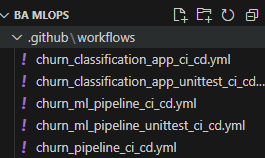

- Define Workflow Triggers (`on`): Within your YAML file, the first thing to configure is when the workflow should run. Example:
    - on: `push`: The workflow runs every time code is pushed to the repository (you can specify branches, e.g., branches: [main]).
    - on: `pull_request`: The workflow runs when a pull request is opened, synchronised, or re-opened.
    - on: `schedule`: You can set it to run at specific intervals, for instance, daily at a certain time to retrain a model.
    - on: `workflow_dispatch`: Allows for manual triggering from the "Actions" tab.

- Define Jobs (`jobs`): Workflows are made up of one or more "jobs." Each job runs on a separate virtual machine (called a "runner"). You'll define distinct jobs for different phases of your pipeline, e.g., `data_preprocessing`, `model_training`, `model_testing`, `model_deployment`. You specify the operating system for the runner, e.g., `runs-on: ubuntu-latest`.

- Define Steps within Jobs (`steps`): Each job consists of a sequence of "steps." These steps are individual tasks that are executed in order. Common Steps for ML CI/CD:

    - Checkout Code: Use the `actions/checkout@v4` Action to get your repository's code onto the runner.

    - Set up Environment: Use `actions/setup-python@v5` to configure the Python version required.

    - Install Dependencies: Run commands like `pip install -r requirements.txt` to install necessary libraries.

    - Run Scripts: Execute your Python scripts for data loading, feature engineering, model training, and evaluation (e.g., `python src/train_model.py`).

    - Run Tests: Execute unit tests, integration tests, and model performance tests (e.g., `pytest`).

    - Build/Push Docker Images: If you're containerising your model.


- Monitor Your Pipeline: Once configured, commit your YAML file to the repository. The workflow will trigger based on your defined `on` events. Go to the "Actions" tab in your GitHub repository. Here, you will see a list of all your workflow runs, their status (success, failure, in progress), and detailed logs for each step. This is your primary dashboard for observing the CI/CD process.

Here below an example of the YAML file for our project.


```
name: Churn ML Project CI/CD (Unittest)

on:
  push:
    branches: [main]
    paths:
      - '02 Building & Integrating ML Pipelines/churn_ml_project_unittest/**'
  pull_request:
    branches: [main]
    paths:
      - '02 Building & Integrating ML Pipelines/churn_ml_project_unittest/**'

jobs:
  test:
    name: Run Unit, Integration, Functional, and E2E Tests
    runs-on: ubuntu-latest

    defaults:
      run:
        # Set the working directory to the project root within the repository
        working-directory: "02 Building & Integrating ML Pipelines/churn_ml_project_unittest"

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python 3.11
      uses: actions/setup-python@v4
      with:
        python-version: '3.11'

    - name: Install Dependencies
      run: |
        pip install -r requirements.txt

    - name: Run Unit Tests
      run: |
        # Run unit tests
        # Assumes pure unit tests are in 'tests/unit/'
        python -m unittest discover tests/unit -p "test_*.py"

    - name: Run Integration Tests
      run: |
        # Run integration tests
        # Assumes integration tests are in 'tests/integration/' and end with '_integration.py'
        python -m unittest discover tests/integration -p "test_*.py"

    - name: Run Functional Tests
      run: |
        # Run functional tests
        # Assumes functional tests are in 'tests/functional/'
        python -m unittest discover tests/functional -p "test_*.py"

    - name: Run E2E Tests
      run: |
        # Run E2E tests
        # Assumes E2E tests are in 'tests/e2e/' and are named e.g., 'e2e_test.py'
        python -m unittest discover tests/e2e -p "test_*.py"

```

Here an example of the requirements.txt for this project:

```
# Core ML Libraries
pandas~=2.0.0      # For data manipulation and analysis
numpy~=1.24.0      # For numerical operations
scikit-learn~=1.2.0 # For machine learning models, preprocessing, and metrics
joblib~=1.2.0      # For saving and loading Python objects, especially scikit-learn models

```

### Pre-Push CI/CD Checklist

Here's a checklist to run through before pushing your changes to the main branch, especially when that push is set to trigger your CI/CD pipeline on GitHub. This helps catch common issues before the automation kicks in.

- [ ] Code Clean: All local changes committed, no temporary or debug code.

- [ ] Tests Pass: All relevant local tests run successfully.

- [ ] Dependencies Current: requirements.txt updated and tested if needed.

- [ ] Documentation Updated: README.md reflects any changes in usage or setup.

- [ ] Workflow Valid: CI/CD workflow files (.yml) are syntactically correct if modified.

- [ ] Clear Commit: Commit message concisely describes the changes.

- [ ] Final Review: Briefly checked all changes and confirming push to main.


After your checklist is complete:

- Prepare Changes: 

    - `git add .` (stages all your modified files)

    - `git commit -m "Your concise commit message"` (saves the changes locally with a note)

- Send to GitHub:

    - `git push origin main` (sends your committed changes to the main branch on GitHub)

- On GitHub, immediately after your push:

    - Your updated code appears in the repository.

    - GitHub Actions detects the change.

    - Your CI/CD workflow automatically starts running.

    - You can watch its progress and results in the "Actions" tab of your GitHub repository.


If no errors are detected... 

__Congratulations, you have deployed an ML CI/CD Process!__

## README.md

Serves as the front door to your project. It should be clear, comprehensive, and easy to navigate, allowing anyone (from a new collaborator to a future self) to quickly understand and engage with your work. `A good README.md` is like a clear project instruction manual and storefront. It should quickly tell you:

- What it is: A brief project summary and its purpose.

- How to set it up: Clear steps to get the code running locally, including dependencies (requirements.txt).

- How to use it: Examples and commands to run the main functionalities.

- What's inside (for ML): Basic info on the data and model, and key results.

- Who made it & how to contribute: Information for collaborators and contact.

- Legal bits: The project's license.

- Essentially, it answers "What is this?", "How do I get it working?", and "How do I use it?".


You can find an example of this file at the end of the notebook. 

# Customer Churn Prediction ML Pipeline with Comprehensive Testing

This project demonstrates a complete, production-style machine learning pipeline for predicting customer churn. Its primary focus is to showcase best practices in MLOps and software engineering, particularly a robust and layered testing strategy using Python's built-in `unittest` framework.

## Project Overview

The goal of this project is to train a classification model (Logistic Regression) on a customer churn dataset. The pipeline handles data loading, cleaning, feature engineering, model training, evaluation, and artifact logging.

The key highlight is the comprehensive test suite, which is structured to reflect the "Testing Pyramid," ensuring code quality, reliability, and maintainability.

## Project Structure

The project is organized into a clear and modular structure:

```
churn_ml_project_unittest_training1/
├── data/
│   └── raw/
│       └── churn_data.csv      # Raw input data
├── model_store/                # Output directory for saved models and logs
├── src/
│   ├── __init__.py
│   ├── config.py               # Centralized configuration for the pipeline
│   ├── data_loader.py          # Module for loading data
│   ├── model.py                # Model class wrapper and metric functions
│   ├── preprocessing.py        # Data cleaning and feature engineering functions
│   └── pipeline.py             # Main pipeline orchestration logic
├── tests/
│   ├── __init__.py
│   ├── unit/                   # Unit tests for individual functions
│   ├── integration/            # Integration tests for component interactions
│   ├── functional/             # Functional tests for user-facing behavior
│   └── e2e/                    # End-to-end test for the full pipeline run
├── main.py                     # Main entrypoint to run the pipeline
└── requirements.txt            # Project dependencies
```

## Key Concepts Demonstrated

*   **Modular Code**: Each part of the ML pipeline (data loading, preprocessing, modeling) is separated into its own module for clarity and reusability.
*   **Centralized Configuration**: Key parameters, file paths, and column names are managed in `src/config.py` for easy modification.
*   **MLOps Best Practices**: The pipeline saves the trained model and logs key metrics and metadata from each run, which is crucial for experiment tracking and reproducibility.
*   **Layered Testing Strategy**: The project implements a full spectrum of tests:
    *   **Unit Tests**: Fast tests that verify the smallest pieces of code (individual functions) in isolation.
    *   **Integration Tests**: Tests that ensure different components of the pipeline work together correctly (e.g., data loading and cleaning).
    *   **Functional Tests**: Tests that verify the application's entrypoint (`main.py`) from a user's perspective, checking its orchestration logic and console output.
    *   **End-to-End (E2E) Tests**: A full run of the pipeline on a small, real dataset to ensure the entire system works as a whole and produces the expected final artifacts.

## Setup and Installation

1.  **Clone the repository:**
    ```bash
    git clone <repository-url>
    cd churn_ml_project_unittest_training1
    ```

2.  **Create and activate a virtual environment (recommended):**
    ```bash
    python -m venv venv
    source venv/bin/activate  # On Windows, use `venv\Scripts\activate`
    ```

3.  **Install the dependencies:**
    ```bash
    pip install -r requirements.txt
    ```

## How to Run

### Running the ML Pipeline

To execute the entire machine learning pipeline, run the `main.py` script from the project's root directory.

```bash
python main.py
```

This will:
1.  Load the raw data from `data/raw/churn_data.csv`.
2.  Execute the full cleaning, transformation, and training pipeline.
3.  Save the trained model to `model_store/churn_model.joblib`.
4.  Save the run metrics and metadata to `model_store/log.json`.

### Running the Tests

The project uses Python's `unittest` framework. You can run all tests using the `discover` command from the root directory.

**Run all tests:**
```bash
python -m unittest discover -s tests -v
```

**Run a specific type of test:**

*   **Unit Tests:**
    ```bash
    python -m unittest discover -s tests/unit -v
    ```
*   **Integration Tests:**
    ```bash
    python -m unittest discover -s tests/integration -v
    ```
*   **Functional Tests:**
    ```bash
    python -m unittest discover -s tests/functional -v
    ```
*   **End-to-End Test:**
    ```bash
    python -m unittest discover -s tests/e2e -v
    ```

**Run a specific test file:**
```bash
python -m unittest tests/unit/test_model.py -v
```

---

This project serves as a robust template for building and validating production-ready machine learning applications.


